This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [73]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [74]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [75]:
train_labels[0]

1

In [76]:
max([max(sequence) for sequence in train_data])


9999

In [77]:
#修改處
min([min(sequence) for sequence in train_data])

1

**Decoding reviews back to text**

In [78]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [79]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [80]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [81]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [82]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [83]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [84]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [85]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5606 - accuracy: 0.7881 - val_loss: 0.4520 - val_accuracy: 0.8524
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3638 - accuracy: 0.8926 - val_loss: 0.3460 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2630 - accuracy: 0.9173 - val_loss: 0.2944 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2048 - accuracy: 0.9325 - val_loss: 0.2864 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1601 - accuracy: 0.9475 - val_loss: 0.2747 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1325 - accuracy: 0.9575 - val_loss: 0.2860 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1112 - accuracy: 0.9665 - val_loss: 0.3025 - val_accuracy: 0.8858
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

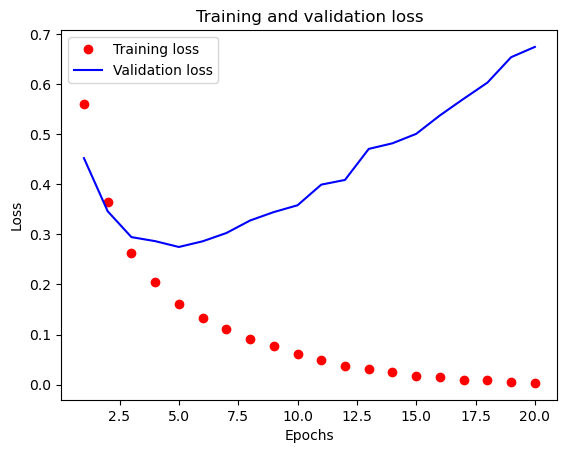

In [86]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#修正處由藍點點改成紅點點
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

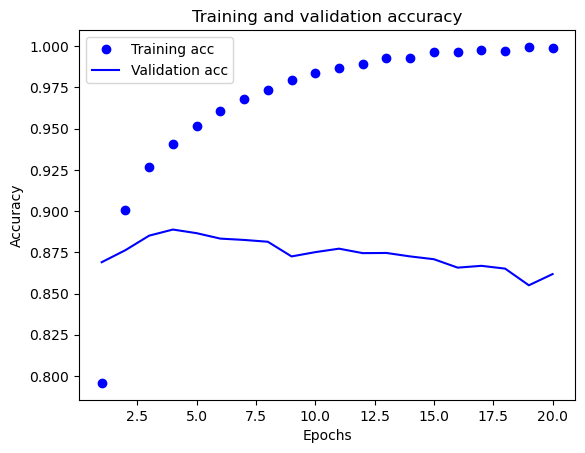

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [87]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#epochs =4 改成epochs =5
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 9ms/step - loss: 0.4636 - accuracy: 0.8148
Epoch 2/5
49/49 [==============================] - 0s 7ms/step - loss: 0.2631 - accuracy: 0.9092
Epoch 3/5
49/49 [==============================] - 0s 7ms/step - loss: 0.2038 - accuracy: 0.9288
Epoch 4/5
49/49 [==============================] - 0s 7ms/step - loss: 0.1687 - accuracy: 0.9410
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.3385 - accuracy: 0.8725


In [88]:
results

[0.33853864669799805, 0.8724799752235413]

### Using a trained model to generate predictions on new data

In [89]:
model.predict(x_test)

782/782 [==============================] - 1s 993us/step


array([[0.08563529],
       [0.9990971 ],
       [0.31941283],
       ...,
       [0.08577219],
       [0.03083566],
       [0.5419558 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [90]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=1000)
#num_words = 10000 改為 num_word = 1000

In [91]:
len(train_data)

8982

In [92]:
len(test_data)

2246

In [93]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2,
 2,
 14,
 46,
 2,
 2,
 86,
 61,
 2,
 2,
 14,
 61,
 451,
 2,
 17,
 12]

**Decoding newswires back to text**

In [94]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [95]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [96]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [97]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [98]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [30]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [31]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.7131 - accuracy: 0.4479 - val_loss: 1.8496 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.5056 - accuracy: 0.6978 - val_loss: 1.3387 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0839 - accuracy: 0.7697 - val_loss: 1.1367 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8390 - accuracy: 0.8236 - val_loss: 1.0166 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6618 - accuracy: 0.8634 - val_loss: 0.9531 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5261 - accuracy: 0.8920 - val_loss: 0.9081 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4209 - accuracy: 0.9134 - val_loss: 0.8926 - val_accuracy: 0.8160
Epoch 8/20
16

**Plotting the training and validation loss**

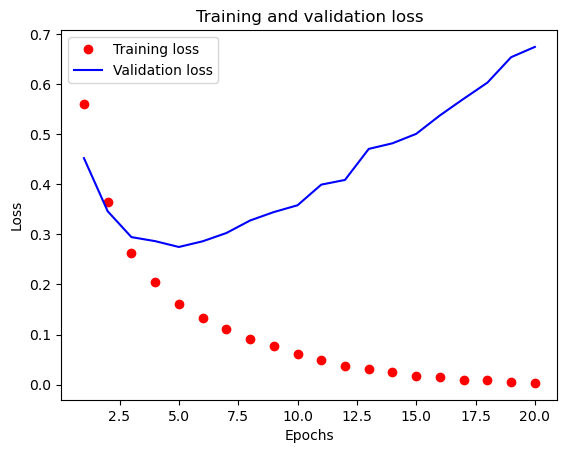

In [99]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

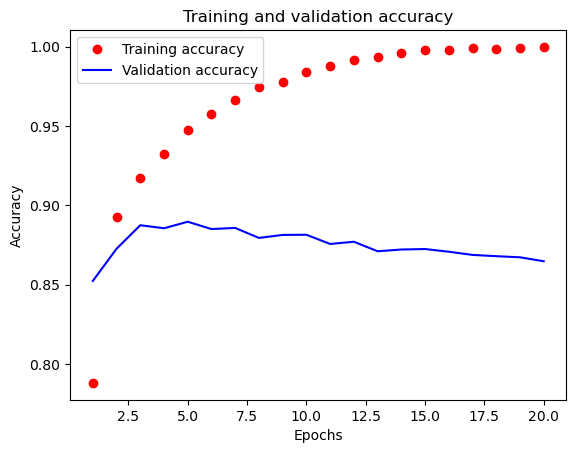

In [100]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [101]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=10,#epochs = 9 改為 epochs = 10
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
18/18 [==============================] - 1s 18ms/step - loss: 2.6138 - accuracy: 0.5183
Epoch 2/10
18/18 [==============================] - 0s 15ms/step - loss: 1.5664 - accuracy: 0.6506
Epoch 3/10
18/18 [==============================] - 0s 16ms/step - loss: 1.3021 - accuracy: 0.7077
Epoch 4/10
18/18 [==============================] - 0s 15ms/step - loss: 1.1441 - accuracy: 0.7465
Epoch 5/10
18/18 [==============================] - 0s 16ms/step - loss: 1.0124 - accuracy: 0.7782
Epoch 6/10
18/18 [==============================] - 0s 15ms/step - loss: 0.9173 - accuracy: 0.7968
Epoch 7/10
18/18 [==============================] - 0s 15ms/step - loss: 0.8395 - accuracy: 0.8096
Epoch 8/10
18/18 [==============================] - 0s 16ms/step - loss: 0.7693 - accuracy: 0.8245
Epoch 9/10
18/18 [==============================] - 0s 16ms/step - loss: 0.7053 - accuracy: 0.8390
Epoch 10/10
71/71 [==============================] - 0s 2ms/step - loss: 0.9843 - accuracy: 0.7711


In [37]:
results

[0.989225447177887, 0.7898486256599426]

In [38]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18744434550311664

### Generating predictions on new data

In [39]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [40]:
predictions[0].shape

(46,)

In [41]:
np.sum(predictions[0])

1.0

In [42]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [43]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [44]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.5502 - accuracy: 0.5118 - val_loss: 1.8531 - val_accuracy: 0.5480
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6514 - accuracy: 0.5601 - val_loss: 1.5919 - val_accuracy: 0.5840
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3899 - accuracy: 0.6146 - val_loss: 1.4787 - val_accuracy: 0.6270
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2120 - accuracy: 0.6601 - val_loss: 1.4187 - val_accuracy: 0.6360
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0779 - accuracy: 0.6981 - val_loss: 1.4100 - val_accuracy: 0.6610
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9729 - accuracy: 0.7375 - val_loss: 1.3775 - val_accuracy: 0.6800
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8864 - accuracy: 0.7625 - val_loss: 1.3762 - val_accuracy: 0.6880
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [46]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 2us/step


In [47]:
train_data.shape

(404, 13)

In [48]:
test_data.shape

(102, 13)

In [49]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [50]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [51]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [52]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [53]:
all_scores

[2.05639386177063, 2.5260510444641113, 2.553966760635376, 2.5086333751678467]

In [54]:
np.mean(all_scores)

2.411261260509491

**Saving the validation logs at each fold**

In [55]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [56]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

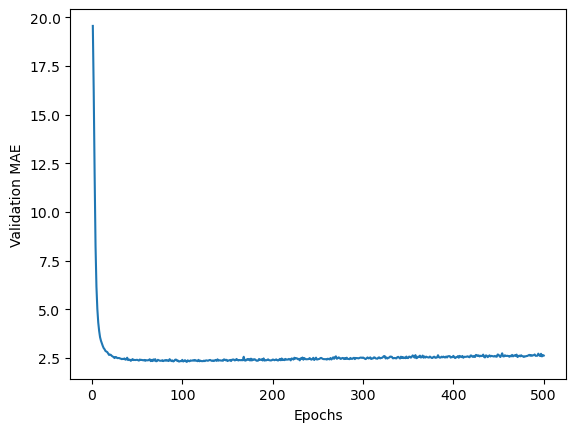

In [57]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

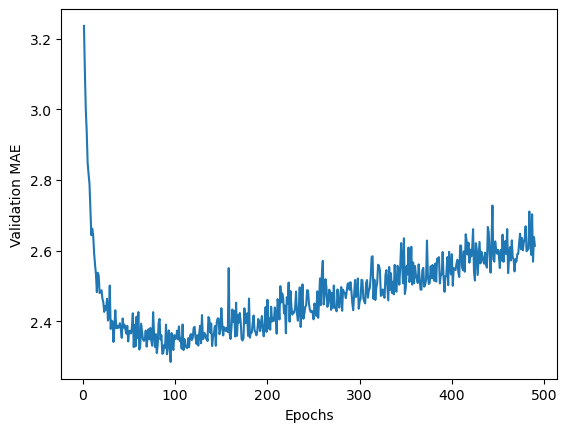

In [58]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [59]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.3753 - mae: 2.6581


In [60]:
test_mae_score

2.6581408977508545

### Generating predictions on new data

In [61]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 1ms/step


array([8.37303], dtype=float32)

### Wrapping up

## Summary